In [3]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/ML-Climate-Predicting-Wildfires/src')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
id_img_map = {}
data_dir = "data/TrainingData/Fire-Negative-5mo/"

for f in os.listdir(data_dir):
  if '_' in f and not 'download_log' in f:
    id = f[:f.index('_')]
    if id in id_img_map:
      id_img_map[id].append(f)
    else:
      id_img_map[id] = [f]
len(id_img_map)

5

2020-TXTXS-200317


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


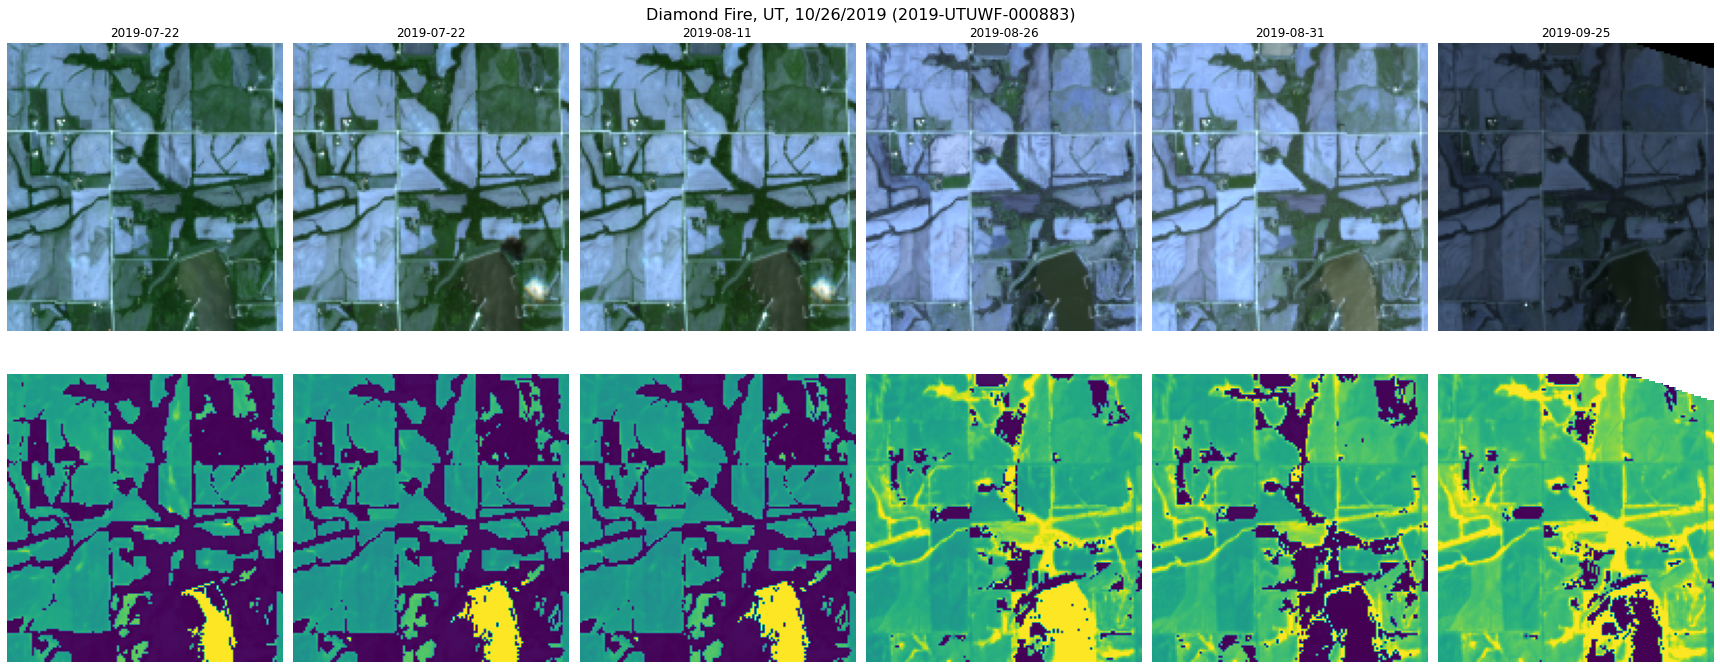

In [25]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(24,10))
for j, (id, fs) in enumerate(list(id_img_map.items())):
  if j==4:
    print(id)
    for i,f in enumerate(fs[::-1]):
      image = np.load(data_dir + f)
      image_rgb = image[:,:,1:4]/np.max(image)
      image_nir = image[:,:,7]
      image_swir = image[:,:,10]
      image_nvdi = (image_nir - image_swir)/(image_nir + image_swir)
      image_rgb_enhanced = np.clip(image_rgb * 2.5, 0, 1)
      image_nvdi_enhanced = np.clip(image_nvdi / 15, 0, 1)
      plt.subplot(2,6,i+1)
      plt.imshow(image_rgb_enhanced)
      plt.axis('off')
      plt.title(dates[::-1][i])
      plt.subplot(2,6,i+7)
      plt.imshow(image_nvdi_enhanced)
      plt.axis('off')
      last_image = image
plt.tight_layout()
fig.suptitle('Diamond Fire, UT, 10/26/2019 (2019-UTUWF-000883)', fontsize=16);
# plt.savefig("figures/DataTimelapse-NegativeExample.png", bbox_inches='tight', dpi=200)

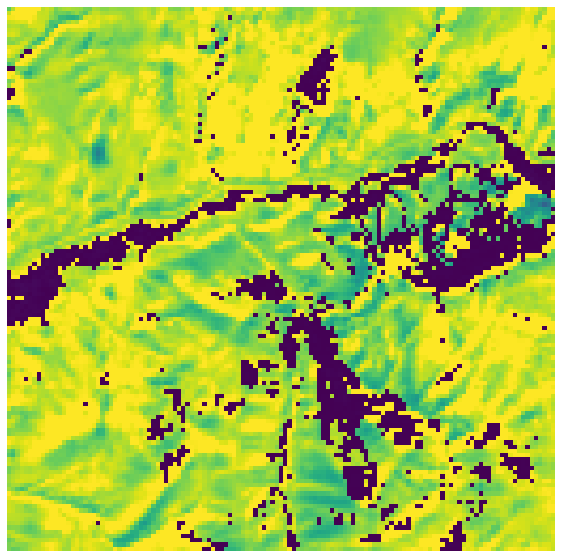

In [ ]:
fig = plt.figure(figsize=(24,10))
plt.axis('off')
plt.imshow(image_nvdi_enhanced)
plt.savefig("figures/InputExample.png", bbox_inches='tight', dpi=200)